<a href="https://colab.research.google.com/github/dongchanlim/CS450/blob/master/Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import convultionaly image classification library
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from tensorflow.keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import tensorflow as tf
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [ ]:
from google.colab import files

file = files.upload()

Saving 81794_189983_bundle_archive.zip to 81794_189983_bundle_archive.zip


In [ ]:
!unzip 81794_189983_bundle_archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard161.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard162.jpg

In [ ]:
# count the list of total images 

base_dir = "Garbage classification/Garbage classification"

image_dir = glob.glob(os.path.join(base_dir, "*/*.jpg"))

len(image_dir)

2527

In [ ]:
plt.figure(figsize=(20, 20))

def show_image_sample(img_class):
  for index, img_path in enumerate(glob.glob(os.path.join(base_dir,  img_class, "*.jpg"))[:6]):
    img = load_img(img_path)
    ar = img_to_array(img)
    plt.subplot(2, 3, index + 1)
    plt.imshow(img)

<Figure size 1440x1440 with 0 Axes>

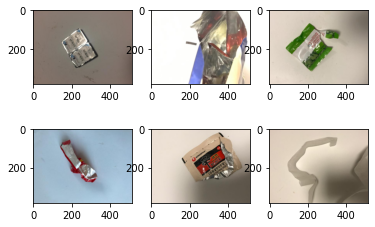

In [ ]:
show_image_sample(os.listdir(base_dir)[0])

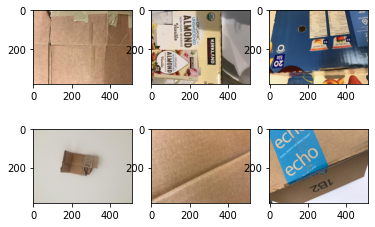

In [ ]:
show_image_sample(os.listdir(base_dir)[1])

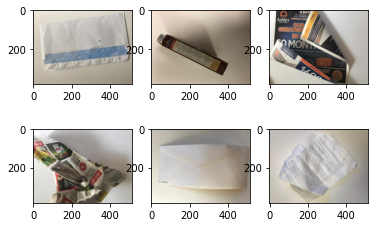

In [ ]:
show_image_sample(os.listdir(base_dir)[2])

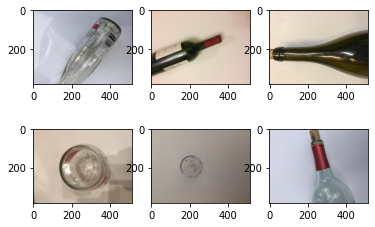

In [ ]:
show_image_sample(os.listdir(base_dir)[3])

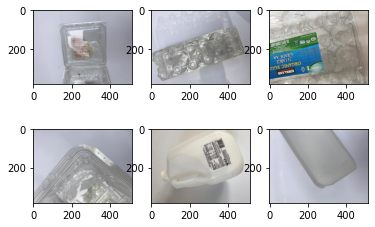

In [ ]:
show_image_sample(os.listdir(base_dir)[4])

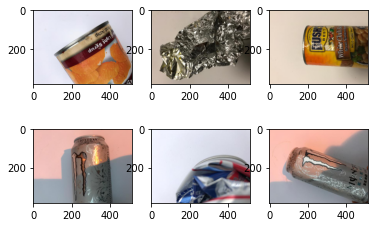

In [ ]:
show_image_sample(os.listdir(base_dir)[5])

In [ ]:
for i in os.listdir(base_dir):
  print(i,": ",len(glob.glob(os.path.join(base_dir, i, "*.jpg"))))

trash :  137
cardboard :  403
paper :  594
glass :  501
plastic :  482
metal :  410


In [ ]:
train_datagen = ImageDataGenerator(
          rescale = 1./255,
          horizontal_flip = True,
          vertical_flip = True,
          rotation_range = 90,
          zoom_range = 0.2
          )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(image_dir,
                                                 target_size = (64, 64),
                                                 batch_size=16,
                                                 class_mode='categorical')